# Logistic Regression `Basic use`

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, mean_squared_error

In [39]:
data = pd.read_csv(r"bodyPerformance.csv", usecols=['height_cm','weight_kg','gender'])

In [40]:
data = data.sample(200)

In [155]:
# Nominal encoding (One Hot Encoding)

data['gender'] = data["gender"].apply(lambda x: 1 if x=='M' else 0) # 1-M, 0-F

In [42]:
# input and output separation from data

X = data.drop(columns=['gender'])
y = data[['gender']]

In [43]:
# train test splitting

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [47]:
# feature scaling

scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Visualization of Scaled Data

<Axes: >

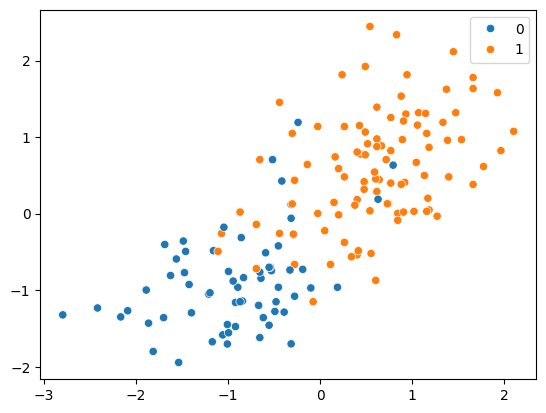

In [64]:
sns.scatterplot( x=X_train_scaled[:,0],y=X_train_scaled[:,1], hue=np.array(y_train).ravel())

### Model trainning
*With unscaled data*

In [65]:
lor = LogisticRegression()
lor.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [84]:
y_pred1 = lor.predict(X_test)

In [91]:
# r2 Score

r2_score(y_test, y_pred1)

0.6799999999999999

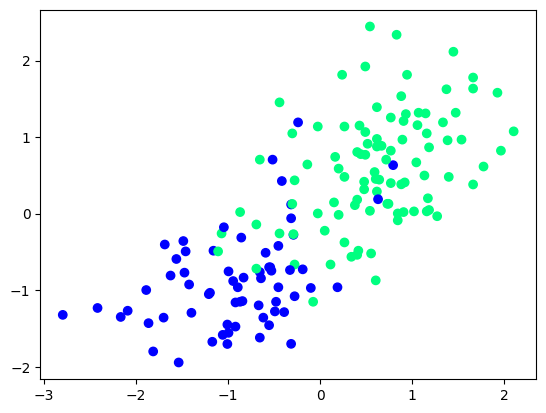

In [93]:
plt.scatter( x=X_train_scaled[:,0],y=X_train_scaled[:,1], cmap='winter', c=np.array(y_train))

### Model trainng 
*with Scaled data*

In [130]:
model2 = LogisticRegression(penalty='l2', C=100, solver='sag')
model2.fit(X_train_scaled, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, solver='sag')

In [131]:
y_pred2 = model2.predict(X_test_scaled)

In [132]:
r2_score(y_test, y_pred2)

0.6799999999999999

In [137]:
# unscaled data
confusion_matrix(y_test, y_pred1)

array([[13,  2],
       [ 1, 24]])

In [138]:
# scaled data
confusion_matrix(y_test, y_pred2)

array([[13,  2],
       [ 1, 24]])

In [142]:
# applying PCA

pca = PCA(n_components=1)
pca.fit(X_train)

In [144]:
X_train_scaled_p = pca.transform(X_train)
X_test_scaled_p = pca.transform(X_test)

In [153]:
r2_score(X_train_scaled_p[:,0],X_train_scaled[:,1])

0.14594443380849553